In [20]:
# importing packages
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.model_selection import validation_curve

from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import recall_score # evaluation metric

In [2]:
df = pd.read_csv("data/ML-MATT-CompetitionQT1920_train.csv",encoding='iso-8859-1')
df.head()


,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0


In [3]:
df = df.drop_duplicates()
df.shape

(36798, 14)

In [4]:
issue_values = df[df["maxUE_UL+DL"] == '#¡VALOR!']
df["maxUE_UL+DL"] = pd.to_numeric(df["maxUE_UL+DL"], errors='coerce')

# Distribution of Target Variable

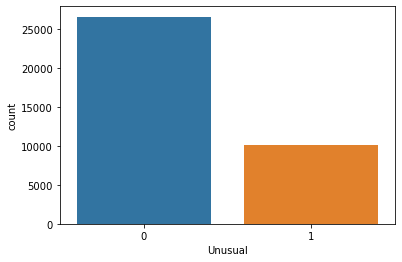

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x="Unusual" )
plt.savefig('Unusual_Counts.png')

# Correlation Matrix

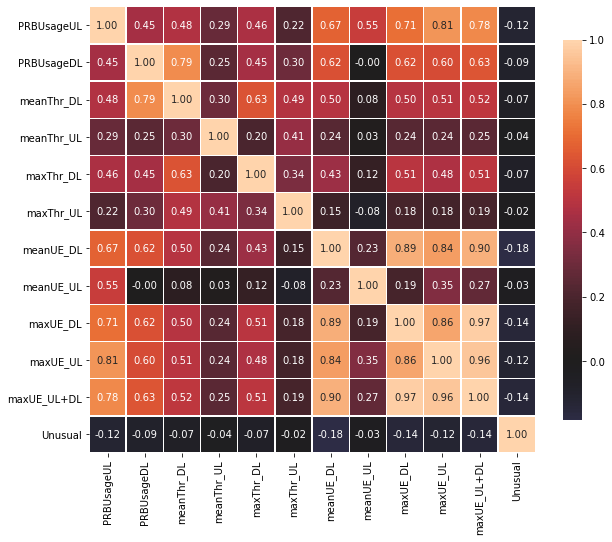

In [6]:

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    
    plt.savefig('Corellation_Heatmap.png')
    plt.show()
    
correlation_heatmap(df)

# Variable Distributions

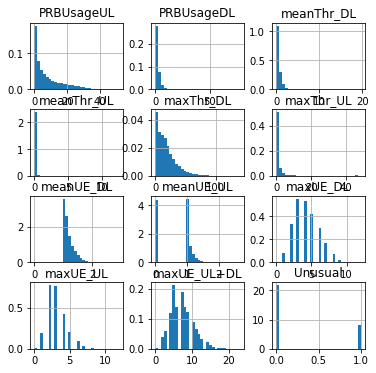

In [7]:
df.hist(bins=30, figsize=(6,6), density=True)
plt.savefig('Anomaly/Data_Distribution.png')
plt.show()

# Is Dataset Balanced?

In [8]:
# Look to see if this dataset is unbalanced. 
cases = len(df)
normal_count = len(df[df.Unusual== 0])
unusual_count = len(df[df.Unusual == 1])
unusual_percentage = round(unusual_count/cases*100, 2)

print(cl('UNUSUAL COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Normal cases are {}'.format(normal_count), attrs = ['bold']))
print(cl('Number of Unusual cases are {}'.format(unusual_count), attrs = ['bold']))
print(cl('Percentage of unusual cases is {}'.format(unusual_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

UNUSUAL COUNT
--------------------------------------------
Total number of cases are 36798
Number of Normal cases are 26618
Number of Unusual cases are 10180
Percentage of unusual cases is 27.66
--------------------------------------------


# Encode Labels

In [9]:
# Encode labels to numeric
labelencoder = LabelEncoder()
df["Time"] = labelencoder.fit_transform(df["Time"])
df["CellName"] = labelencoder.fit_transform(df["CellName"])

# Impute Missing Values with Median

In [10]:
df = df.fillna(df.median())

In [11]:
# https://www.askpython.com/python/examples/k-fold-cross-validation

In [12]:
X = df.drop('Unusual', axis = 1).values
y = df['Unusual'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Normalize Data

In [13]:
# Normalize dataset after split in order to avoid data leakage. 
# scaler = StandardScaler()
# # scaler = StandardScaler()

# X_train = pd.DataFrame(scaler.fit_transform(X_train))
# X_test = pd.DataFrame(scaler.transform(X_test))

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# X_test = scaler.transform(X_test)



# Learning Curves

In [15]:
#https://www.dataquest.io/blog/learning-curves-machine-learning/

In [16]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, scoring = "accuracy",
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, scoring = scoring,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # plot scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    plt.title(title)

    return plt

In [ ]:
#1 DTs
title = "Learning Curves (Decision Tree)"

# model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
model = DecisionTreeClassifier(max_depth = 20)
plot_learning_curve(model, title, X, y, cv=5)
plt.xlabel("Training Examples Used")
plt.ylabel("Accuracy")
plt.savefig('Anomaly/LR_DecisionTree.png')
plt.show()

In [ ]:
# title = "Learning Curves (Neural Networks)"

# model = MLPClassifier(max_iter = 1000)
# plot_learning_curve(model, title, X_train, y_train, cv=5)
# plt.xlabel("Training Examples Used")
# plt.ylabel("Accuracy")
# plt.savefig('Anomaly/LR_NueralNet.png')
# plt.show()

In [ ]:
title = "Learning Curves (AdaBoost)"

model = AdaBoostClassifier(n_estimators=1000, random_state=0)
plot_learning_curve(model, title, X_train, y_train, cv=5)
plt.xlabel("Training Examples Used")
plt.ylabel("Accuracy")
plt.savefig('Anomaly/LR_AdaBoost.png')
plt.show()

In [ ]:
title = "Learning Curves (SVM)"

pca = PCA(n_components=3)# adjust yourself
pca.fit(X)
X_transformed = pca.transform(X)
svm_model = svm.SVC(kernel = "linear")


title = "Learning Curves (SVM)"
plot_learning_curve(svm_model, title, X_transformed, y, cv=5)
# plot_learning_curve(svm_model, title, X_t_train, y_train, cv=5)
plt.xlabel("Training Examples Used")
plt.ylabel("Accuracy")
plt.savefig('Anomaly/LR_SVM.png')
plt.show()

In [ ]:
# title = "Learning Curves (SVM)"

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# pca = PCA(n_components=3)# adjust yourself
# pca.fit(X_train)
# X_t_train = pca.transform(X_train)
# X_t_test = pca.transform(X_test)

# # svm_model = svm.SVC(kernel = "linear", gamma = .01, C = 10000)
# svm_model = svm.SVC(kernel = "linear")
# # svm_model.fit(X_t_train, y_train)
# # svm_yhat = svm_model.predict(X_t_test)
# # print(accuracy_score(y_test, svm_yhat))

# title = "Learning Curves (SVM)"
# plot_learning_curve(svm_model, title, X_t_train, y_train, cv=5)
# # plot_learning_curve(svm_model, title, X_t_train, y_train, cv=5)
# plt.xlabel("Training Examples Used")
# plt.ylabel("Accuracy")
# plt.savefig('Anomaly/LR_SVM.png')
# plt.show()

In [ ]:
title = "Learning Curves (KNN)"

model = KNeighborsClassifier()
plot_learning_curve(model, title, X, y, cv=5)
plt.xlabel("Training Examples Used")
plt.ylabel("Accuracy")
plt.savefig('Anomaly/LR_KNN.png')
plt.show()

# Validation Curves

***

#### Decision Trees

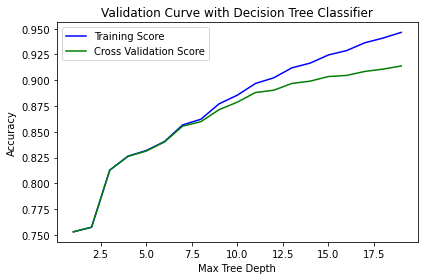

In [17]:
estimator = DecisionTreeClassifier()
estimator.get_params().keys()
parameter_range = np.arange(1, 20,1)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(DecisionTreeClassifier(), X, y,
                                       param_name = "max_depth",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('Anomaly/VC_Decision Trees_H1.png')

plt.show()

In [ ]:
parameter_range = np.arange(2, 100,1)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(DecisionTreeClassifier(), X, y,
                                       param_name = "max_leaf_nodes",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Minimum Samples at Leaf Node")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('Anomaly/VC_Decision Trees_H2.png')

plt.show()

#### Neural Nets

In [ ]:
estimator = MLPClassifier()
# estimator.get_params().keys()
parameter_range = [0.0001,0.001,0.01,0.1]
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "alpha",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with Neural Nets (alpha)")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('Anomaly/VC_NeuralNets_H1.png')

plt.show()

In [ ]:
estimator = MLPClassifier()
# estimator.get_params().keys()
parameter_range = [0.0001,.0005,0.001,.005,0.01,.05]
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "learning_rate_init",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with Neural Nets (Learning Rate)")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('Anomaly/VC_NeuralNets_H2.png')

plt.show()

#### AdaBoost

In [ ]:
estimator = AdaBoostClassifier()
# estimator.get_params().keys()

parameter_range = np.arange(1,1000,100)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "n_estimators",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with AdaBoost")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('Anomaly/VC_AdaBoost_H1.png')
plt.show()

In [ ]:
estimator = AdaBoostClassifier()
# estimator.get_params().keys()

parameter_range = np.arange(0.1,1,.1)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "learning_rate",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with AdaBoost (Learning Rate)")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('Anomaly/VC_AdaBoost_H2.png')

plt.show()

#### SVM

In [ ]:

# scaler = StandardScaler()
# X_transformed = scaler.fit_transform(X)
# # X_test = scaler.transform(X_test)

pca = PCA(n_components=2)# adjust yourself
pca.fit(X)
X_transformed = pca.transform(X)

estimator = svm.SVC()
# estimator = svm.SVC()
# estimator.get_params().keys()

parameter_range = np.linspace(0.1,1,10)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X_transformed, y,
                                       param_name = "C",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with SVM (C)")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('Anomaly/VC_SVM_H1.png')

plt.show()

In [ ]:
estimator = svm.SVC(kernel = "linear")
# estimator.get_params().keys()

parameter_range = np.linspace(0.1,1,10)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X_transformed, y,
                                       param_name = "gamma",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with AdaBoost (Learning Rate)")
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('Anomaly/VC_SVM_H2.png')

plt.show()

#### KNN

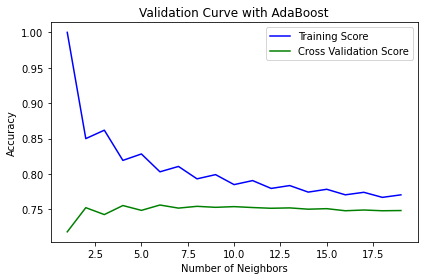

In [18]:
estimator = KNeighborsClassifier(metric = 'euclidean')
# estimator.get_params().keys()

parameter_range = np.arange(1,10,1)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with AdaBoost")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('Anomaly/VC_KNN_H1.png')
plt.show()

In [ ]:
estimator = KNeighborsClassifier(metric = 'manhattan')

parameter_range = np.arange(1,10,1)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with AdaBoost")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('Anomaly/VC_KNN_H2.png')
plt.show()

# Modeling

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# 1. Decision Tree
start = time.time()
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)

end = time.time()
print("Training time: ",end - start, " seconds")

start = time.time()
tree_yhat = tree_model.predict(X_test)
end = time.time()
print("Query time: ",end - start, " seconds")

print("Accuracy: ", accuracy_score(y_test, tree_yhat))

Training time:  0.14018988609313965  seconds
Query time:  0.002652883529663086  seconds
Accuracy:  0.8362771739130435


In [24]:
# 2. Neural Networks (Cross-Entropy loss function)(Softmax activation function)
start = time.time()
nn_model = MLPClassifier(solver='lbfgs', alpha=1e-4,hidden_layer_sizes=(5, 2), random_state=0, max_iter = 1000)
nn_model.fit(X, y)

end = time.time()
print("Training time: ",end - start, " seconds")

start = time.time()
nn_yhat = nn_model.predict(X_test)
end = time.time()
print("Query time: ",end - start, " seconds")
print("Accuracy: ", accuracy_score(y_test, nn_yhat))

Training time:  20.17875909805298  seconds
Query time:  0.003693103790283203  seconds
Accuracy:  0.7904891304347826


/Users/wilmertejada/opt/anaconda3/envs/Anomaly_Detection/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [25]:
#3. Boosting (AdaBoost)
start = time.time()
boost_model = AdaBoostClassifier(n_estimators=1000, random_state=0)
boost_model.fit(X_train, y_train)
end = time.time()
print("Training time: ",end - start, " seconds")

start = time.time()
boost_yhat = boost_model.predict(X_test)
end = time.time()
print("Query time: ",end - start, " seconds")
print("Accuracy: ", accuracy_score(y_test, boost_yhat))

Training time:  50.55910396575928  seconds
Query time:  1.6680798530578613  seconds
Accuracy:  0.9490489130434783


In [26]:
#4. SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=3)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

# svm_model = svm.SVC(kernel = "linear", gamma = .01, C = 10000)
svm_model = svm.SVC(kernel = "linear")

start = time.time()
svm_model.fit(X_t_train, y_train)
end = time.time()
print("Training time: ",end - start, " seconds")

start = time.time()

svm_yhat = svm_model.predict(X_t_test)
end = time.time()
print("Query time: ",end - start, " seconds")
print(accuracy_score(y_test, svm_yhat))


Training time:  16.543434619903564  seconds
Query time:  10.300201892852783  seconds
0.7236806348171096


In [27]:
#5. K-Nearest Neighbors

n = 5
knn = KNeighborsClassifier(n_neighbors = n)
start = time.time()
knn.fit(X_train, y_train)
end = time.time()
print("Training time: ",end - start, " seconds")

start = time.time()
knn_yhat = knn.predict(X_test)
end = time.time()
print("Query time: ",end - start, " seconds")
print(accuracy_score(y_test, knn_yhat))

Training time:  0.0367128849029541  seconds
Query time:  5.049797296524048  seconds
0.740203271916952


In [ ]:
# Accuracy score

# print(cl('ACCURACY SCORE', attrs = ['bold']))
# print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('Decision Tree = {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
# print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('Neural Network = {}'.format(accuracy_score(y_test, nn_yhat)), attrs = ['bold'], color = 'red'))
# print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('AdaBoost = {}'.format(accuracy_score(y_test, boost_yhat)), attrs = ['bold'], color = 'red'))
# print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('SVM = {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold'], color = 'red'))
# print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('KNN = {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold']))
# print(cl('--------------------------------------------------', attrs = ['bold']))

In [ ]:
# title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = svm.SVC(gamma=0.001)
# plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

# plt.show()